In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
def dq(df, cols=None):
    if cols is None:
        cols = df.columns
    df_dq = None
    for col in cols:
        tmp = pd.DataFrame()
        tmp.loc[0,'column'] = col
        tmp.loc[0,'count'] = df.shape[0]
        tmp.loc[0,'count_valid'] = df[df[col].notnull()].shape[0]
        tmp.loc[0,'perc_valid'] = round(df[df[col].notnull()].shape[0]/df.shape[0]*100,2)
        tmp.loc[0,'count_nulls'] = df[df[col].isnull()].shape[0]
        tmp.loc[0,'perc_nulls'] = round(df[df[col].isnull()].shape[0]/df.shape[0]*100,2)
        tmp.loc[0,'count_unique'] = df[col].nunique()
        if df_dq is None:
            df_dq = tmp
        else:
            df_dq = pd.concat([df_dq,tmp])
            
    return df_dq
        
    

In [22]:
train_dq = dq(train)

In [23]:
train_dq

,column,count,count_valid,perc_valid,count_nulls,perc_nulls,count_unique
0,Id,1460.0,1460.0,100.00,0.0,0.00,1460.0
0,MSSubClass,1460.0,1460.0,100.00,0.0,0.00,15.0
0,MSZoning,1460.0,1460.0,100.00,0.0,0.00,5.0
0,LotFrontage,1460.0,1201.0,82.26,259.0,17.74,110.0
0,LotArea,1460.0,1460.0,100.00,0.0,0.00,1073.0
0,Street,1460.0,1460.0,100.00,0.0,0.00,2.0
0,Alley,1460.0,91.0,6.23,1369.0,93.77,2.0
0,LotShape,1460.0,1460.0,100.00,0.0,0.00,4.0
0,LandContour,1460.0,1460.0,100.00,0.0,0.00,4.0
0,Utilities,1460.0,1460.0,100.00,0.0,0.00,2.0


In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

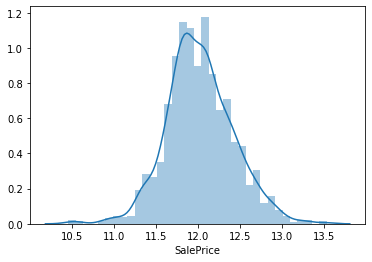

In [14]:
sns.distplot(np.log(train['SalePrice']))


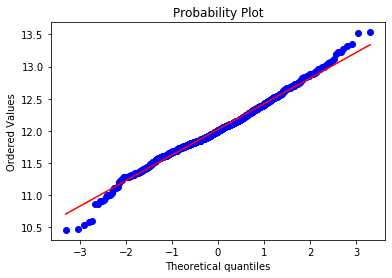

In [15]:
res = stats.probplot(np.log(train['SalePrice']), plot=plt)
plt.show()

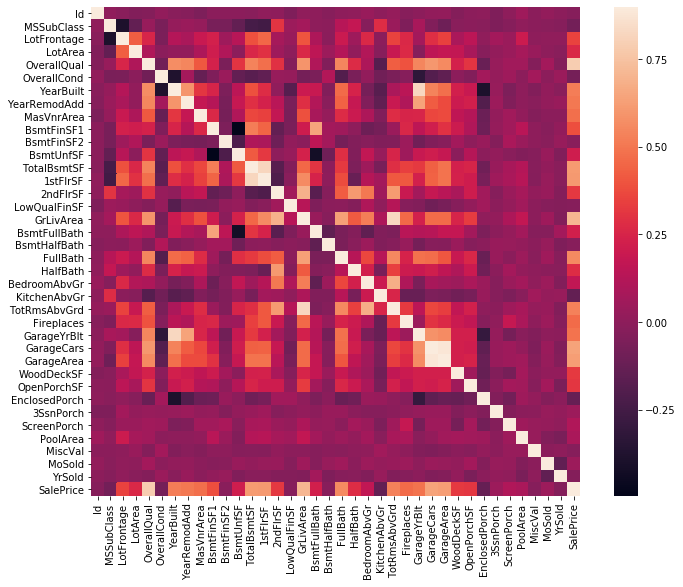

In [16]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [25]:
train_dq[train_dq.count_nulls!=0]

,column,count,count_valid,perc_valid,count_nulls,perc_nulls,count_unique
0,LotFrontage,1460.0,1201.0,82.26,259.0,17.74,110.0
0,Alley,1460.0,91.0,6.23,1369.0,93.77,2.0
0,MasVnrType,1460.0,1452.0,99.45,8.0,0.55,4.0
0,MasVnrArea,1460.0,1452.0,99.45,8.0,0.55,327.0
0,BsmtQual,1460.0,1423.0,97.47,37.0,2.53,4.0
0,BsmtCond,1460.0,1423.0,97.47,37.0,2.53,4.0
0,BsmtExposure,1460.0,1422.0,97.40,38.0,2.60,4.0
0,BsmtFinType1,1460.0,1423.0,97.47,37.0,2.53,6.0
0,BsmtFinType2,1460.0,1422.0,97.40,38.0,2.60,6.0
0,Electrical,1460.0,1459.0,99.93,1.0,0.07,5.0


In [31]:
train.LotFrontage = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))